#  <center> Laboratory Tutorial - 3 TFY4200: Mie Theory</center>

<center> Nils Petter Jørstad, 480441, nilspj </center>

<center> April 24, 2020 </center>

---

## Introduction

In this document, I present my answers and results to the questions in the Mie scattering laboratory turorial. Further-more, I discuss whether my results adhered to the expectations and are reasonable.

# 1.  Analyse the PyMieScatt Code:

***

This tutorial was done in Python using the PyMieScatt librarary for scattering calculations [2]. Comments to the “PyMieScatt” library code most relevant for this tutorial, with specific references to equations in B&H [1], can be found below.

## Functions for Forward Mie Calculations of Homogeneous Spheres

### Functions for single particles 

- **MieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])**: Computes Mie efficencies $Q_{e x t},Q_{s c a}, Q_{a b s},Q_{b}$ and $Q_{pr}$ and the asymmetry parameter $g$ of a single, homogeneous particle. $Q_{e x t},Q_{s c a}, Q_{a b s}$ come from the cross section equations *3.25*, *4.61*, *4.62* in B&H, where $Q_{\mathrm{i}}=\frac{C_{\mathrm{i}}}{G}$. The asymmetry parameter equation is in B&H chap. *3.4*, $Q_{pr}$ and $Q_{p}$ is given by the equations in chap *4.5* and *4.6* respectively.


- **Mie_ab(m, x)**: Calculates expansion coefficients a$_n$ amd b$_n$. Equation *4.53* in B&H.


- **Mie_cd(m, x)**: Calculates expansion coefficients c$_n$ amd d$_n$. Equation *4.52* in B&H.


- **RayleighMieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])**: Computes Mie efficencies of a spherical particle in the Rayleigh regime $(where the size parameter: x \ll 1)$. 


- **AutoMieQ(m, wavelength, diameter[, nMedium=1.0, crossover=0.01, asDict=False, asCrossSection=False])**: Returns Mie efficencies of a spherical particle according to either MieQ() or RayleighMieQ() depending on the magnitude of the size parameter.


- **LowFrequencyMieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])**: Returns Mie efficencies of a spherical particle in the low-frequency regime $(x\ll 1)$.


- **LowFrequencyMie_ab(m, x)**: Returns external field coefficients an and bn, limiting the expansion of an and bn to second order.

### Functions for single particles across various ranges

- **MieQ_withDiameterRange(m, wavelength[, nMedium=1.0, diameterRange=(10, 1000), nd=1000, logD=False])**: Computes the Mie efficencies of particles across a diameter range.


- **MieQ_withWavelengthRange(m, diameter[, nMedium=1.0, wavelengthRange=(100, 1600), nw=1000, logW=False])**: Computes the Mie efficencies of particles across a wavelength range. 


- **MieQ_withSizeParameterRange(m[, nMedium=1.0, xRange=(1, 10), nx=1000, logX=False])**: Computes the Mie efficencies of particles across a size parameter range.

### Angular Functions

- **ScatteringFunction(m, wavelength, diameter[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])**: Creates arrays for plotting the angular scattering intensity functions in theta-space with parallel, perpendicular, and unpolarized light.


- **SF_SD(m, wavelength, dp, ndp[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])**: Creates arrays for plotting the angular scattering intensity functions in theta-space with parallel, perpendicular, and unpolarized light. Also includes an array of the angles for each step for a distribution nd(dp).


- **MatrixElements(m, wavelength, diameter, mu[, nMedium=1.0])**: Calculates the four nonzero scattering matrix elements S11, S12, S33, and S34 as functions of μ=cos(θ), where θ is the scattering angle. Equations *4.77* in B&H.


- **MieS1S2(m, x, mu)**: Calculates $S_{1}$ and $S_{2}$ at $\mu=\cos (\theta),$ where $\theta$ is the scattering angle. Equations *4.74* in B&H


- **MiePiTau(mu, nmax)**: Calculates $\pi_{\mathrm{n}}$ and $\tau_{\mathrm{n}}$. Equations *4.47* in B&H. 

[1]

# 2. Test the most important functions used in the solutions

The most important functions used in the Mie-Theory solution are the: Bessel functions, Hankel functions, Legendre polynomials, $\pi, \tau$ and Bessel-Ricatti functions. To Verify that the functions are well behaved w.r.t. the literature they were plotted and compared to the plots in B&H. 

In [312]:
# imported libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp 
import scipy.special as sps

***

## Spherical Bessel Functions

The PieMieScat library uses spherical Bessel functions from the library "SciPy", the resulting plots for the First and Second kind can be seen below.

### First Kind

Text(0, 0.5, 'j$_{\\mathrm{n}}$($\\rho$)')

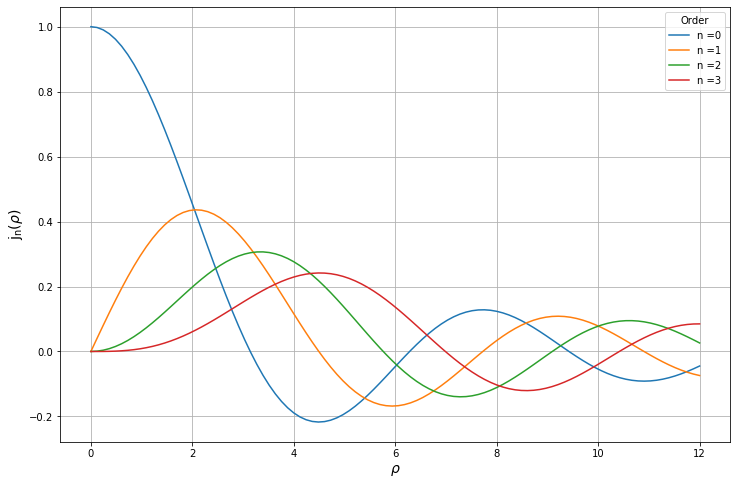

In [313]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
[plt.plot(x,sps.spherical_jn(v,x),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"j$_{\mathrm{n}}$($\rho$)", size = 14)

### Second Kind 

Text(0, 0.5, 'y$_{\\mathrm{n}}$($\\rho$)')

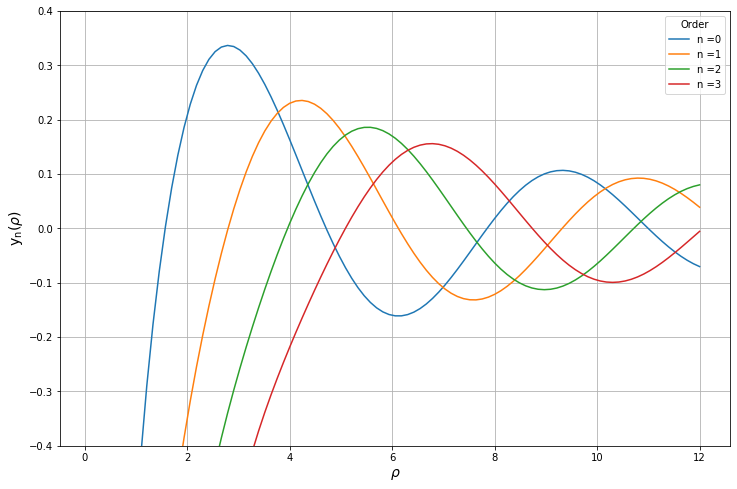

In [314]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
[plt.plot(x,sps.spherical_yn(v,x),label ="n =" + str(v)) for v in V]
plt.ylim(-0.4,0.4)
plt.grid()
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"y$_{\mathrm{n}}$($\rho$)", size = 14)

Both plots are identical to the ones in figure 4.2 on page 88 in B&H! 

## Spherical Hankel Functions

The spherical Hankel functions of first and second kind can be seen below. 

### First Kind

Text(0, 0.5, 'Re(h$_{\\mathrm{n}}^{(1)}$($\\rho$))')

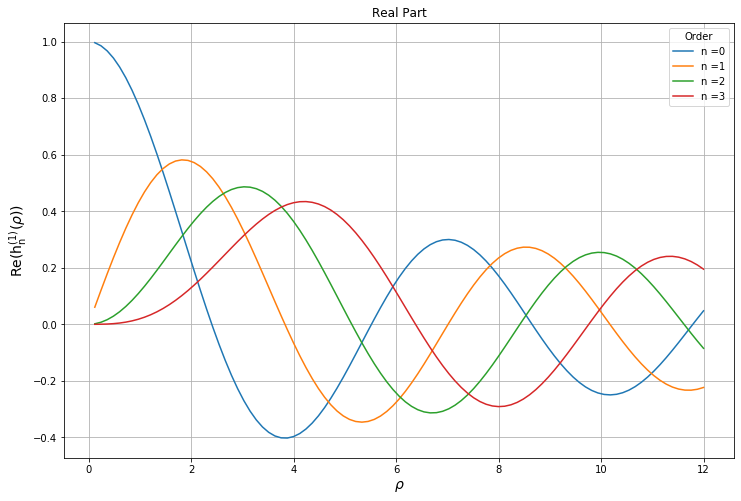

In [315]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
plt.title("Real Part")
[plt.plot(x,np.real(sps.hankel1(v,x)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"Re(h$_{\mathrm{n}}^{(1)}$($\rho$))", size = 14)

Text(0, 0.5, 'Im(h$_{\\mathrm{n}}^{(1)}$($\\rho$))')

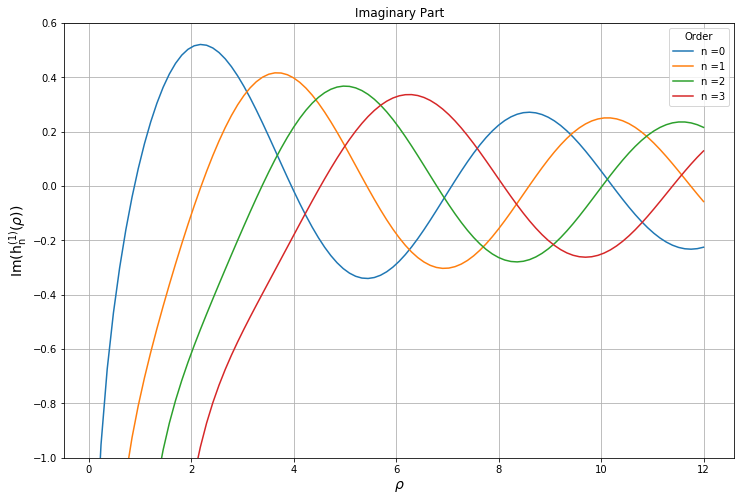

In [316]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
plt.title("Imaginary Part")
[plt.plot(x,np.imag(sps.hankel1(v,x)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.ylim(-1,0.6)
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"Im(h$_{\mathrm{n}}^{(1)}$($\rho$))", size = 14)

The Hankel function of first kind is given by: $h_{n}^{(1)}(\rho)=j_{n}(\rho)+i y_{n}(\rho)$ 
In the plots we see that the function behaves correctly since the real and imaginary parts are the spherical Bessel functions of first and second kind(With opposite sign) respectively. They are identical to the plots in figure 4.2 B&H.

### Second Kind

Text(0, 0.5, 'Re(h$_{\\mathrm{n}}^{(2)}$($\\rho$))')

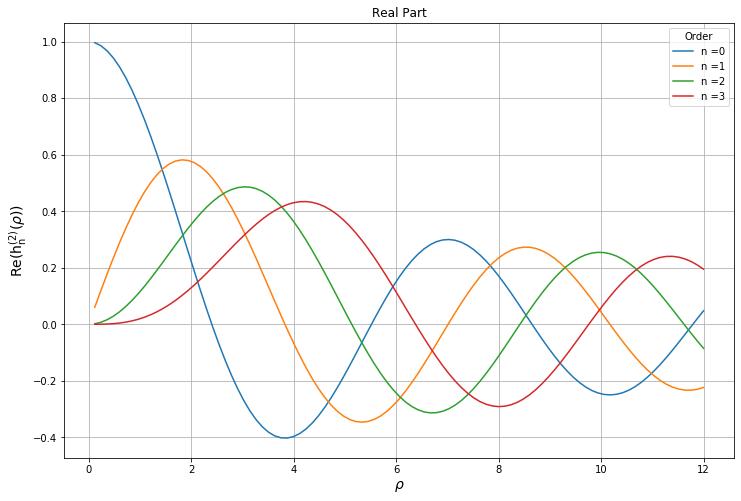

In [317]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
plt.title("Real Part")
[plt.plot(x,np.real(sps.hankel2(v,x)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"Re(h$_{\mathrm{n}}^{(2)}$($\rho$))", size = 14)

Text(0, 0.5, 'Im(h$_{\\mathrm{n}}^{(2)}$($\\rho$))')

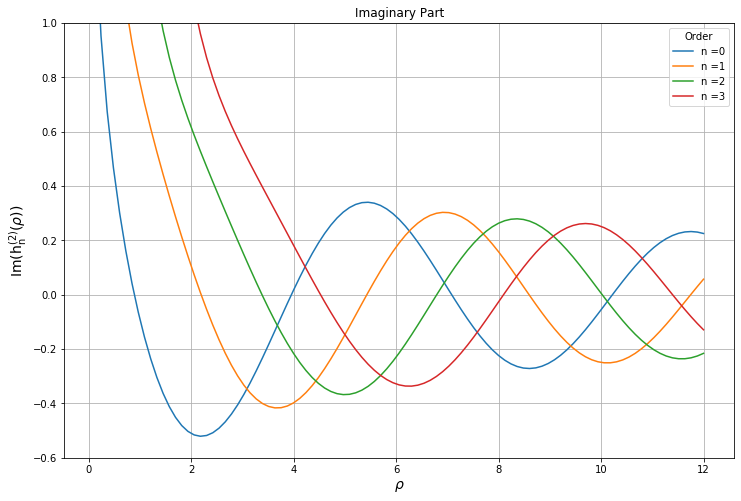

In [318]:
V = [0,1,2,3] #Order
x = np.linspace(0,12,100) #x-values
plt.figure(figsize=(12,8))
plt.title("Imaginary Part")
[plt.plot(x,np.imag(sps.hankel2(v,x)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.ylim(-0.6,1)
plt.legend(title = "Order")
plt.xlabel(r"$\rho$",size = 14)
plt.ylabel(r"Im(h$_{\mathrm{n}}^{(2)}$($\rho$))", size = 14)

The Hanlkel functions of the second kind are given by: $h_{n}^{(2)}(\rho)=j_{n}(\rho)-i y_{n}(\rho)$.
In the plots we see that the function behaves correctly since the real and imaginary parts are the spherical Bessel functions of first and second kind respectively. They are identical to the plots in figure 4.2 B&H! except for the imaginary part being a flipped spherical bessel function of the second kind.

## Legendre functions of first kind

The Legendre functions of the first kind, of zeroth (Legendre polynomials) and first order, can be seen below.

### Legendre polynomials (m=0)

Text(0, 0.5, 'P$_{\\mathrm{n}}}$($\\mu$)')

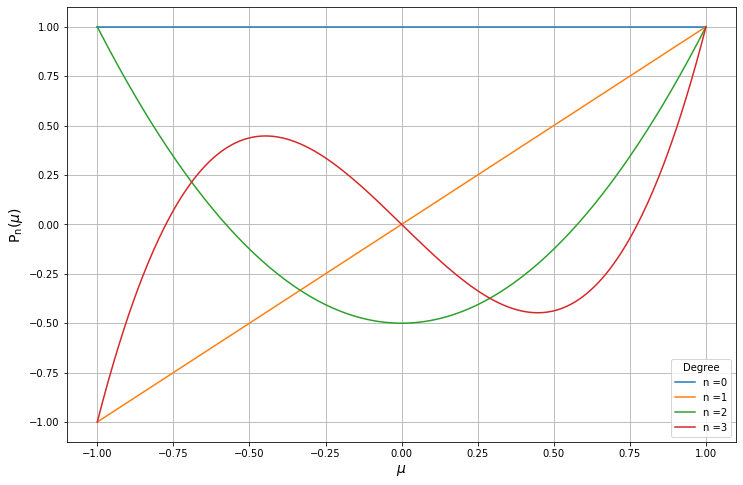

In [319]:
V = [0,1,2,3] #degree
theta = np.linspace(0,np.pi,200) #angles
x = np.cos(theta) #x-values
plt.figure(figsize=(12,8))
[plt.plot(x,sps.lpmv(0, v, x),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Degree")
plt.xlabel(r"$\mu$",size = 14)
plt.ylabel(r"P$_{\mathrm{n}}}$($\mu$)", size = 14)

An identical plot can be found in figure D.1 in reference [2]. 

### First Order (m = 1)

Text(0, 0.5, 'P$_{\\mathrm{n}}^{1}$($\\mu$)')

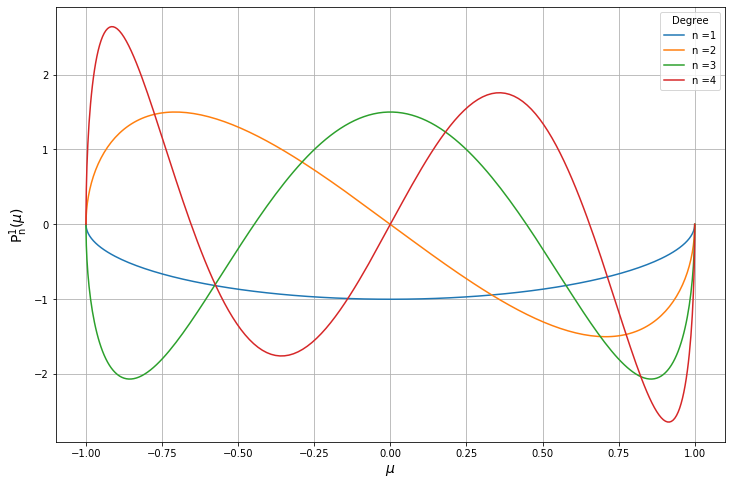

In [320]:
V = [1,2,3,4] #degree
theta = np.linspace(0,np.pi,200) #angles
x = np.cos(theta) #x-values
plt.figure(figsize=(12,8))
[plt.plot(x,sps.lpmv(1, v, x),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Degree")
plt.xlabel(r"$\mu$",size = 14)
plt.ylabel(r"P$_{\mathrm{n}}^{1}$($\mu$)", size = 14)

An identical plot can be found in figure D.2 in reference [3]. 

## $\pi$ & $\tau$ Function

The polar plots of the  $\pi$ and $\tau$ functions can be seen below.

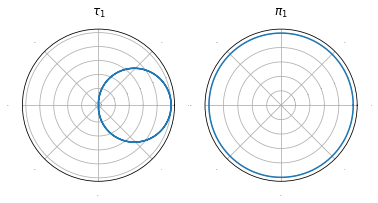

In [321]:
theta = np.linspace(0,2*np.pi,200) #scattering angle
mu = np.cos(theta) #Cosine of scattering angle 
nmax = 5 #max order
pi = np.transpose(np.asarray([ps.MiePiTau(np.cos(t), nmax)[0] for t in theta])) #Pi function
tau = np.transpose(np.asarray([ps.MiePiTau(np.cos(t), nmax)[1] for t in theta])) #Tau function

#Plots 
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
axs[0].plot(theta+(tau[0]<0)*np.pi, np.abs(tau[0]),label ="$\tau_1$")
axs[0].set_title(r"$\tau_1$")
axs[0].tick_params(labelsize = 0)
axs[1].plot(theta+(pi[0]<0)*np.pi, np.abs(pi[0]),label ="$\pi_1$")
axs[1].set_title("$\pi_1$")
axs[1].tick_params(labelsize = 0)


plt.show()

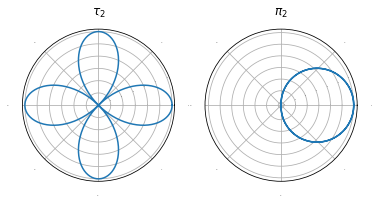

In [322]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
axs[0].plot(theta+(tau[1]<0)*np.pi, np.abs(tau[1]),label ="$\tau_2$")
axs[0].set_title(r"$\tau_2$")
axs[0].set_ylim(0,3.1)
axs[0].tick_params(labelsize = 0)
axs[1].plot(theta+(pi[1]<0)*np.pi, np.abs(pi[1]),label ="$\pi_2$")
axs[1].set_title("$\pi_2$")
axs[1].tick_params(labelsize = 0)
plt.show()

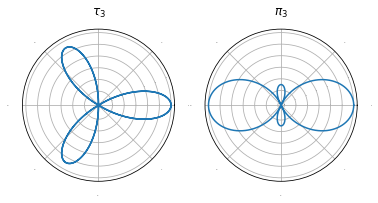

In [323]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
axs[0].plot(theta+(tau[2]<0)*np.pi, np.abs(tau[2]),label ="$\tau_3$")
axs[0].set_title(r"$\tau_3$")
axs[0].tick_params(labelsize = 0)
axs[1].plot(theta+(pi[2]<0)*np.pi, np.abs(pi[2]),label ="$\pi_3$")
axs[1].set_title("$\pi_3$")
axs[1].tick_params(labelsize = 0)
plt.show()

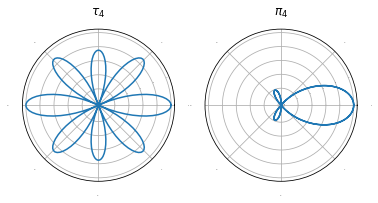

In [324]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
axs[0].plot(theta+(tau[3]<0)*np.pi, np.abs(tau[3]),label ="$\tau_4$")
axs[0].set_title(r"$\tau_4$")
axs[0].tick_params(labelsize = 0)
axs[1].plot(theta+(pi[3]<0)*np.pi, np.abs(pi[3]),label ="$\pi_4$")
axs[1].set_title("$\pi_4$")
axs[1].tick_params(labelsize = 0)
plt.show()

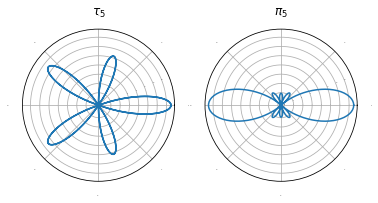

In [325]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
axs[0].plot(theta+(tau[4]<0)*np.pi, np.abs(tau[4]),label ="$\tau_5$")
axs[0].set_title(r"$\tau_5$")
axs[0].tick_params(labelsize = 0)
axs[1].plot(theta+(pi[4]<0)*np.pi, np.abs(pi[4]),label ="$\pi_51$")
axs[1].set_title("$\pi_5$")
axs[1].tick_params(labelsize = 0)
plt.show()

The plots are identical to figure 4.3 in B&H [1].  

## Riccati-Bessel functions


The plots of the Riccati-Bessel functions up to third order can be seen below.

$\psi_{n}(\boldsymbol{\rho})=\rho j_{n}(\boldsymbol{\rho})$:

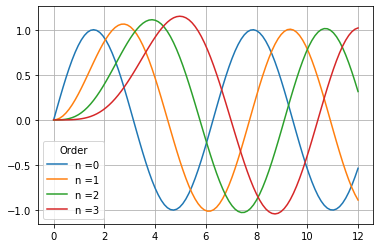

In [326]:
V = [0,1,2,3] #Order
rho = np.linspace(0,12,100) #x-values
#plot
[plt.plot(rho,rho*sps.spherical_jn(v,rho),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Order")

$\quad \xi_{n}(\boldsymbol{\rho})=\rho h_{n}^{(1)}(\boldsymbol{\rho})$:

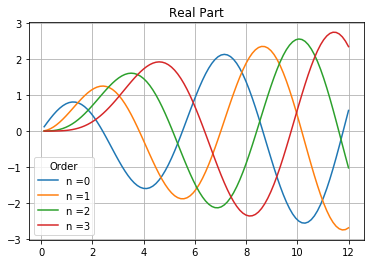

In [327]:
V = [0,1,2,3 ] #Order
rho = np.linspace(0,12,100) #x-values
#plots
plt.title("Real Part")
[plt.plot(rho,rho*np.real(sps.hankel1(v,rho)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.legend(title = "Order")

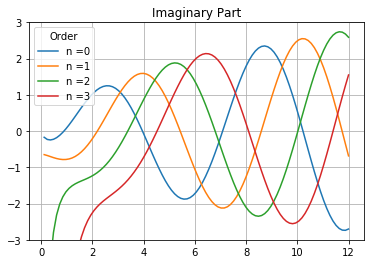

In [328]:
plt.title("Imaginary Part")
[plt.plot(rho,rho*np.imag(sps.hankel1(v,rho)),label ="n =" + str(v)) for v in V]
plt.grid()
plt.ylim(-3,3)
plt.legend(title = "Order")

A reference was not found to verify that these functions are well behaved. However since the code only uses the SciPy spherical Bessel and Hankel functions, which are well behaved w.r.t literature , to calculate the Riccati-Bessel functions, it is logical to conclude that they also correct. 

# 3. convergence tests

***

In B&H chapter 4.8, p.126 , it is stated that the series in equations 4.61 , 4.62 and 4.74 converge for a large number of terms n, this is tested below [1].

**Convergence test for equatiom 4.61 in B&H:**
$$
C_{\mathrm{sca}}=\frac{W_{s}}{I_{i}}=\frac{2 \pi}{\mathrm{k}^{2}} \sum_{n=1}^{\infty}(2 n+1)\left(\left|a_{n}\right|^{2}+\left|b_{n}\right|^{2}\right)
$$
To see if it converges as the number of terms increases, the sum up to the n'th term: C$_{ext}^{n}$, is calculated for increasing n. Then the absolute of the difference between C$_{sca}^{n}$ and the PyMieScat solution: C$_{sca}$ is plotted as a function of n:

In [329]:
def C_sca(m,l,x, N): 
    k = 2*np.pi/l
    an,bn = ps.Mie_ab(m, x)
    return (2*np.pi/(k**2))*np.sum([(2*(n+1)+1)*(np.abs(an[n])**2 + np.abs(bn[n])**2) for n in range(N)])

In [330]:
m = 1.33
diameter = 2*1.0*10**3 # nm
wavelength = 60 #nm
x = np.pi*diameter/wavelength
nmax = 2+x+4*x**(1/3)
_, csca_sol, _, _, _, _, _ = ps.MieQ(m, wavelength, diameter, asCrossSection=True)

N = np.linspace(1,nmax,100,dtype = np.int)
csca_trunc = [C_sca(m,wavelength, x, n) for n in N]

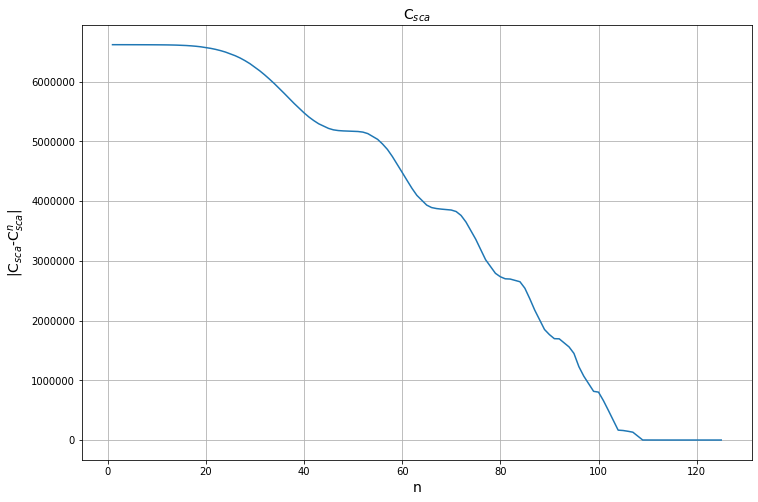

In [331]:
plt.figure(figsize=(12,8))
plt.title("C$_{sca}$",size =14)
plt.plot(N,np.abs(np.subtract(csca_trunc,csca_sol)))
plt.ylabel('|C$_{sca}$-C$_{sca}^n$|',size = 14)
plt.xlabel("n",size = 14)
plt.grid()

**Convergence test for equatiom 4.62 in B&H:**
$$
C_{\mathrm{ext}}=\frac{W_{\mathrm{ext}}}{I_{i}}=\frac{2 \pi}{\mathrm{k}^{2}} \sum_{n=1}^{\infty}(2 n+1) \operatorname{Re}\left(a_{n}+b_{n}\right)$
$$
To see if it converges as the number of terms increases, the sum up to the n'th term: C$_{ext}^{n}$, is calculated for increasing n. Then the absolute of the difference between C$_{ext}^{n}$ and the PyMieScat solution: C$_{ext}$ is plotted as a function of n:

In [332]:
def C_ext(m,l,x, N):
    k = 2*np.pi/l
    an,bn = ps.Mie_ab(m, x)
    return (2*np.pi/(k**2))*np.sum([(2*(n+1)+1)*(np.real(an[n]+bn[n])) for n in range(N)])

In [333]:
m = 1.33
diameter = 2*1.0*10**3 # nm
wavelength = 60 #nm
x = np.pi*diameter/wavelength
nmax = 2+x+4*x**(1/3)
cext_sol, _, _, _, _, _, _ = ps.MieQ(m, wavelength, diameter, asCrossSection=True)

N = np.linspace(1,nmax,100,dtype = np.int)
cext_trunc = [C_ext(m,wavelength, x, n) for n in N]

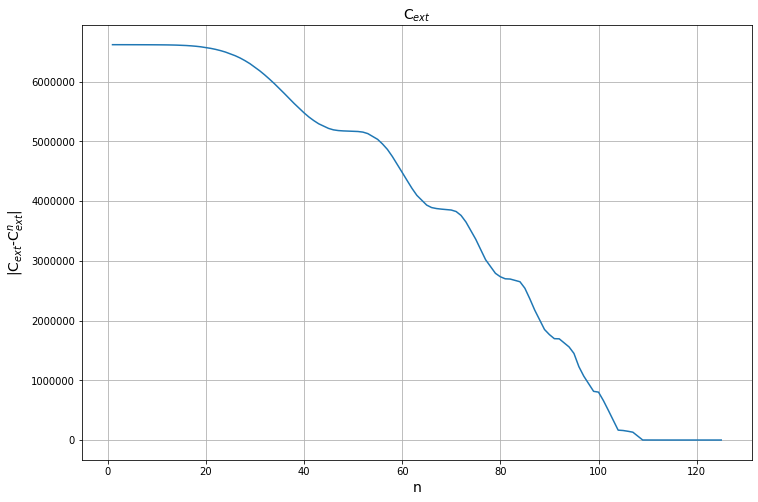

In [334]:
plt.figure(figsize=(12,8))
plt.title("C$_{ext}$",size =14)
plt.plot(N,np.abs(np.subtract(cext_trunc,cext_sol)))
plt.ylabel('|C$_{ext}$-C$_{ext}^n$|',size = 14)
plt.xlabel("n",size = 14)
plt.grid()

**Convergence test for equatiom 4.74 in B&H:**

$S_{1}=\sum_{n} \frac{2 n+1}{n(n+1)}\left(a_{n} \pi_{n}+b_{n} \tau_{n}\right)$, 

$S_{2}=\sum_{n} \frac{2 n+1}{n(n+1)}\left(a_{n} \tau_{n}+b_{n} \pi_{n}\right)$

To see if it the equations converge as the number of terms in the sum increases, the sum up to the n'th term: S$_{i}^{n}$, is calculated for increasing n. Then the absolute of the difference between S$_{i}^{n}$ and the PyMieScat solution: S$_{i}$ is plotted as a function of n:

In [335]:
def S1(m,x,mu, N):
    x = np.pi*diameter/wavelength
    an,bn = ps.Mie_ab(m, x)
    pi ,tau  = ps.MiePiTau(mu, N)
    return np.sum([(2*(n+1)+1)*(an[n]*pi[n] + bn[n]*tau[n])/((n+1)*((n+1)+1)) for n in range(N)])

In [336]:
m = 1.33
diameter = 2*1.0*10**3 # nm
wavelength = 100 #nm
mu = np.cos(np.pi/6)
x = np.pi*diameter/wavelength
nmax = np.int(2+x+4*x**(1/3))
nmin = 2
S1_sol, _ = ps.MieS1S2(m, x, mu)

N = np.linspace(nmin,nmax,np.int(nmax-nmin),dtype = np.int)
S1_n = [S1(m,x,mu, n) for n in N]

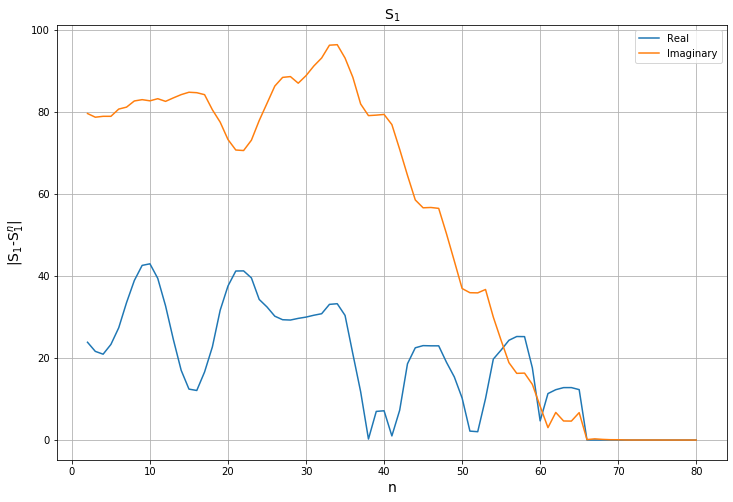

In [337]:
plt.figure(figsize=(12,8))
plt.title("S$_{1}$",size =14)
plt.plot(N,np.abs(np.subtract(np.real(S1_n),np.real(S1_sol))),label ="Real")
plt.plot(N,np.abs(np.subtract(np.imag(S1_n),np.imag(S1_sol))),label ="Imaginary")
plt.ylabel('|S$_{1}$-S$_{1}^n$|',size = 14)
plt.xlabel("n",size = 14)
plt.grid()
plt.legend()

In [338]:
def S2(m,x,mu, N):
    x = np.pi*diameter/wavelength
    an,bn = ps.Mie_ab(m, x)
    pi ,tau  = ps.MiePiTau(mu, N)
    return np.sum([(2*(n+1)+1)*(an[n]*tau[n] + bn[n]*pi[n])/((n+1)*((n+1)+1)) for n in range(N)])

In [339]:
m = 1.33
diameter = 2*1.0*10**3 # nm
wavelength = 100 #nm
mu = np.cos(np.pi/6)
x = np.pi*diameter/wavelength
nmax = np.int(2+x+4*x**(1/3))
nmin = 2
_, S2_sol = ps.MieS1S2(m, x, mu)

N = np.linspace(nmin,nmax,np.int(nmax-nmin),dtype = np.int)
S2_n = [S2(m,x,mu, n) for n in N]

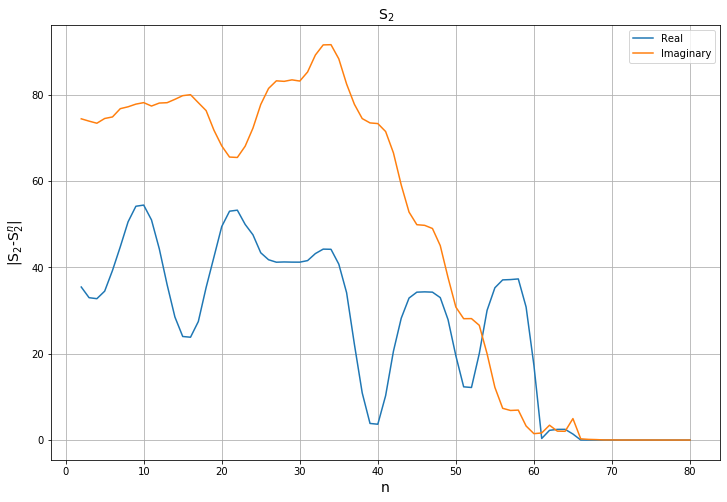

In [340]:
plt.figure(figsize=(12,8))
plt.title("S$_{2}$",size =14)
plt.plot(N,np.abs(np.subtract(np.real(S2_n),np.real(S2_sol))),label ="Real")
plt.plot(N,np.abs(np.subtract(np.imag(S2_n),np.imag(S2_sol))),label ="Imaginary")
plt.ylabel('|S$_{2}$-S$_{2}^n$|',size = 14)
plt.grid()
plt.xlabel("n",size = 14)
plt.legend()

All the series in the solutions converge as expected. 

# 4.  Verify the code

***

The code is verified by reproducing som of the plots from B&H [1].

## Extinction Mie Efficiency of Water droplets

Reproduction of Figure 11.5 a) and b) chapter 11. p.297 in B&H [1].

In [341]:
m = 1.3325+1j*7.2792*10**(-9) # Complex refractive index of particle
n = 1.0 # Complex refractive index of surrounding medium, default = 1 (air)

Text(0.5, 0, 'Size Parameter')

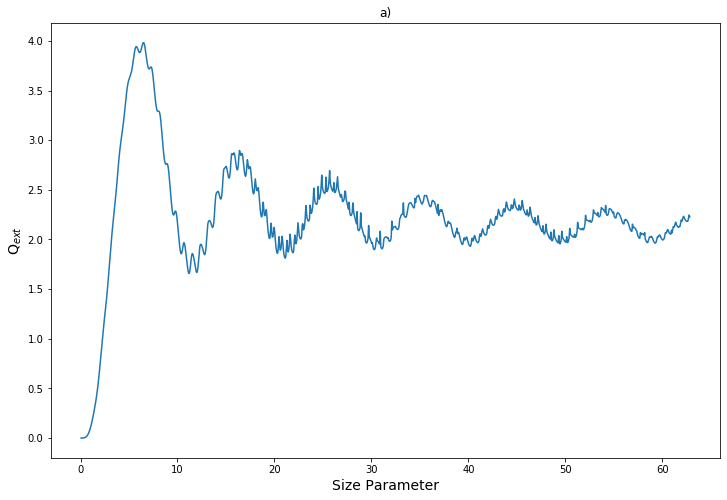

In [342]:
wavelength = 600 #nm

diameters ,qext, qsca, qabs, g, qpr, qback, qratio = ps.MieQ_withDiameterRange(m, wavelength, diameterRange=(10, 12000), nd=1000)
xValues = np.pi*diameters/wavelength

plt.figure(figsize=(12,8))
plt.title("a)")
plt.plot(xValues,qext)
plt.ylabel("Q$_{ext}$", size = 14)
plt.xlabel("Size Parameter", size = 14)


Text(0.5, 0, 'Size Parameter')

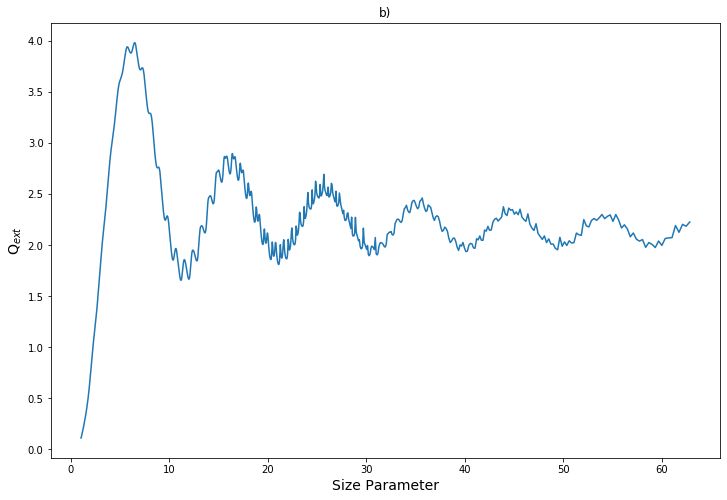

In [343]:
diameter = 2000
wavelength, qext, qsca, qabs, g, qpr, qback, qratio = ps.MieQ_withWavelengthRange(m, diameter, wavelengthRange=(100, 6000), nw=10000)
xValues = np.pi*diameter*np.power(wavelength,-1)

plt.figure(figsize=(12,8))
plt.title("b)")
plt.plot(xValues,qext)
plt.ylabel("Q$_{ext}$", size = 14)
plt.xlabel("Size Parameter", size = 14)

The reproduction plots are very similar to the original plots in B&H. 

## scattering amplitude for Spheres With m = 1.55

Reproduction of Figure chapter 13.2, p.386 in B&H [1].

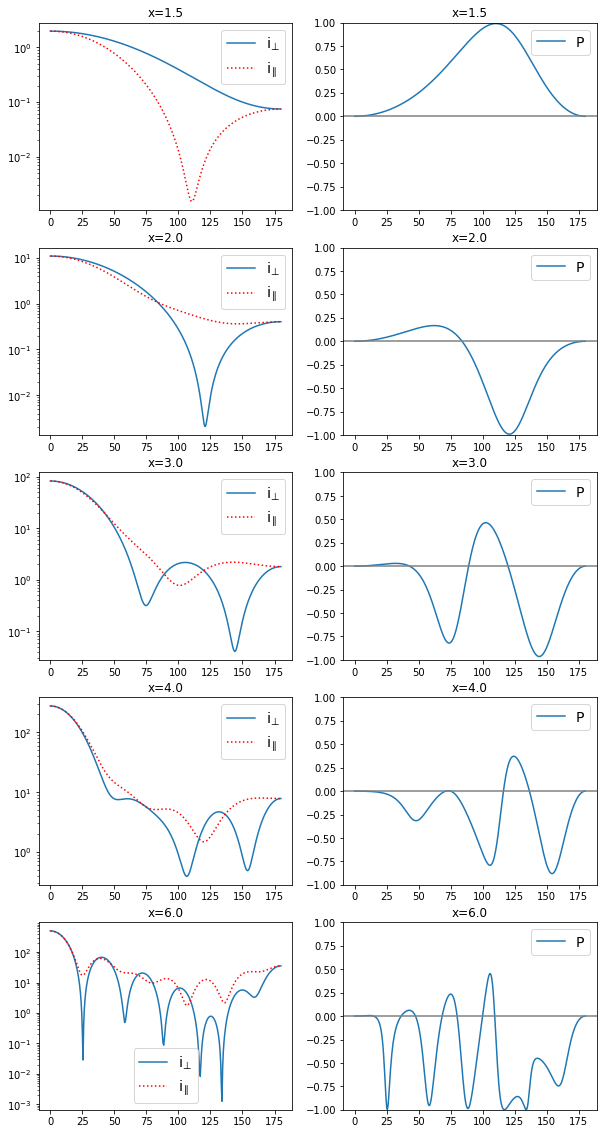

In [344]:
m = 1.55
x= np.asarray([1.5,2,3,4,6])
a = np.asarray([200,400,600,800,1000]) # nm
wavelength = 2*np.pi*n*a*np.power(x,-1) #nm

f = plt.figure(figsize=(10,20))
                        
for i in range(wavelength.size):
    theta, SL, SR ,SU = ps.ScatteringFunction(m, wavelength[i], 2*a[i], angleMeasure='degrees')
    P = np.float64(SL-SR)/np.float64(SL+SR)
        
    f.add_subplot(5, 2, 2*i+1)
    plt.title("x="+ str(x[i]))
    plt.semilogy(theta,SL, label = r"i$_{\bot}$")
    plt.semilogy(theta,SR, 'r:', label = "i$_{\parallel}$")
    plt.legend(fontsize = 14)
    f.add_subplot(5, 2, 2*i+2)
    plt.title("x="+ str(x[i]))
    plt.plot(theta,P, label = r"P")
    plt.ylim(-1,1)
    plt.axhline(y=0.0, color='grey', linestyle='-')
    plt.legend(fontsize = 14)
plt.show()

The reproduction plots are identical to the original ones in B&H. 

# 5. Ag and Au spheres and SiO$_2$  in Air

Using the Mie theory for a sphere,the Scattering cross section and the extinction efficiency was calculated for silver, gold and
silicon dioxide spheres, with radii ranging from below to above the quasi-static limit $ d \ll \lambda$ i.e. the particle is much smaller than the wavelength of light in the surrounding medium. The complex refractive indices of Au, Ag and SiO$_2$ were taken from the Optical properties Database file on Black Board. 

The extinction cross section in the quasi-static limit is given approximately by equation 5.14 in Maier [4]: 
### $$ C_{\mathrm{ext}}=9 \frac{\omega}{c} \varepsilon_{m}^{3 / 2} V \frac{\varepsilon_{2}}{\left[\varepsilon_{1}+2\varepsilon_{m}\right]^{2}+\varepsilon_{2}^{2}}$$ ###
, and will be used for comparison with the numerical extinction efficiency. 

In [345]:
def qext_quasiStatic(m, diameter, energy):
    e1 = np.real(m)
    e2 = np.imag(m)
    V = 4/3*np.pi*(diameter/2)**3
    c = 3.0*10**8
    omega = energy*1.6*10**(-19)/(1.05*10**(-34))
    cext = 9*omega*V*e2/(c*((e1+2)**2+e2**2))
    return cext*10**(-9)/(np.pi*(diameter/2)**2)

In [346]:
def data_reader(fileName):
    '''
    Reads the data files and converts eV to nm and e1e2 to nk if necessary
    '''
    data = np.loadtxt(fileName,skiprows=3)
    file = open (fileName,"r")
    print('*' + file.readline())
    content = file.read().splitlines()
    for line in content:
        if line == "ANGSTROMS":
            data[:,0] *=10**(-1) #convert to nm
            print("-Converted Angstroms to nm \n ")
        if line =="EV" or line =="eV":
            data[:,0] = h*c*10**(9)/(eV*data[:,0]) # convert to nm 
            print("-Converted eV to nm ")
        if line == "e1e2":
            e1 = data[:,1] 
            e2 = data[:,2]
            data[:,1] = np.sqrt((np.abs(e1+1j*e2)+e1)/2)
            data[:,2] = np.sqrt((np.abs(e1+1j*e2)-e1)/2)    
            print("-Converted e1e2 to nk \n")     
    file.close()
    return data 

In [347]:
####  Material Data ##### 
#n + ik as function of wavelength 
h  = 6.63 * 10**(-34)
c = 3*10**8
eV = 1.6 *10**(-19)

Ag = data_reader("Ag.txt") 
Au = data_reader("Au.txt")
SiO2 = data_reader("SiO2_JAW.txt")

*Silver (From Palik I: pp. 355-356): 138nm-2583nm

-Converted Angstroms to nm 
 
*Gold (From Palik I: pp.293-294):  207-1823nm

-Converted Angstroms to nm 
 
*Thermal SiO2, Herzinger et.al., JAP v83p3323y1998, (multi-wavelength, multi-sample analysis)

-Converted eV to nm 


In [348]:
#### Ag #########
m_Ag = Ag[:,1]+1j*Ag[:,2] # complex refractive indices 
wavelength_Ag = Ag[:,0] # Wavelengths (nm)
eV_Ag = h*c/(eV*wavelength_Ag*10**(-9)) # Energies (eV)
diameter_Ag = np.asarray([20,60,100,200,600,1000]) #np.asarray([np.amax(wavelength_Ag)/100, np.amax(wavelength_Ag), np.amax(wavelength_Ag)*100]) 

qext_Ag = np.zeros((diameter_Ag.size,wavelength_Ag.size))
csca_Ag = np.zeros((diameter_Ag.size,wavelength_Ag.size))
for j in range(diameter_Ag.size):
    for i in range(wavelength_Ag.size):
        qext_Ag[j][i], _, _, _, _, _, _ = ps.MieQ(m_Ag[i], wavelength_Ag[i], diameter_Ag[j])
        _, csca_Ag[j][i], _, _, _, _, _ = ps.MieQ(m_Ag[i], wavelength_Ag[i], diameter_Ag[j], asCrossSection=True)      
        
#### Au ######
m_Au = Au[:,1]+1j*Au[:,2]# complex refractive indices
wavelength_Au = Au[:,0]# Wavelengths (nm)
eV_Au = h*c/(eV*wavelength_Au*10**(-9)) # Energies (eV)
diameter_Au = np.asarray([20,60,100,200,600,1000])#np.asarray([np.amax(wavelength_Au)/100, np.amax(wavelength_Au), np.amax(wavelength_Au)*100]) 


qext_Au = np.zeros((diameter_Au.size,wavelength_Au.size))
csca_Au = np.zeros((diameter_Au.size,wavelength_Au.size))
for j in range(diameter_Au.size):
    for i in range(wavelength_Au.size):
        qext_Au[j][i], _, _, _, _, _, _ = ps.MieQ(m_Au[i], wavelength_Au[i], diameter_Au[j])
        _, csca_Au[j][i], _, _, _, _, _ = ps.MieQ(m_Au[i], wavelength_Au[i], diameter_Au[j], asCrossSection=True)      
         
#### SiO2 ######
m_SiO2 = SiO2[:,1]+1j*SiO2[:,2]# complex refractive indices
wavelength_SiO2 = SiO2[:,0] # Wavelengths (nm)
eV_SiO2 = h*c/(eV*wavelength_SiO2*10**(-9)) # Energies (eV)
diameter_SiO2 =np.asarray([20,60,100,200,600,1000])# np.asarray([np.amax(wavelength_SiO2)/100, np.amax(wavelength_SiO2), np.amax(wavelength_SiO2)*100]) 


qext_SiO2 = np.zeros((diameter_SiO2.size,wavelength_SiO2.size))
csca_SiO2 = np.zeros((diameter_SiO2.size,wavelength_SiO2.size))
for j in range(diameter_SiO2.size):
    for i in range(wavelength_SiO2.size):
        qext_SiO2[j][i], _, _, _, _, _, _ = ps.MieQ(m_SiO2[i], wavelength_SiO2[i], diameter_SiO2[j])
        _, csca_SiO2[j][i], _, _, _, _, _ = ps.MieQ(m_SiO2[i], wavelength_SiO2[i], diameter_SiO2[j], asCrossSection=True)      

## Extinction Efficiencies:

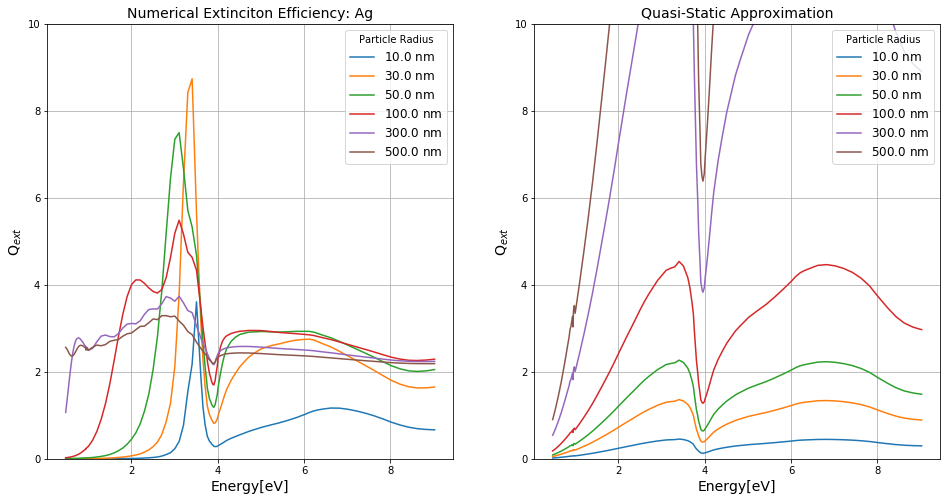

In [349]:
###### Extinction efficiency plots ######## 
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title("Numerical Extinciton Efficiency: Ag",size = 14)
[plt.plot(eV_Ag,qext_Ag[i],label = str(np.round(diameter_Ag[i]/2,3)) + "$\ $nm") for i in range(diameter_Ag.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(0,10)
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Quasi-Static Approximation",size = 14)
[plt.plot(eV_Ag,qext_quasiStatic(m_Ag, diameter_Ag[i], eV_Ag), label = str(np.round(diameter_Ag[i]/2,3)) + "$\ $nm") for i in range(diameter_Ag.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(0,10)
plt.grid()

plt.show()



We can see that for Ag the Quasi-Static Approximation is quite close to the numerical calculation in magnitude for the smallest particle radii, however the difference increases rapidly with the radii. The peak at $3.5$ eV is not present in the approximation.  

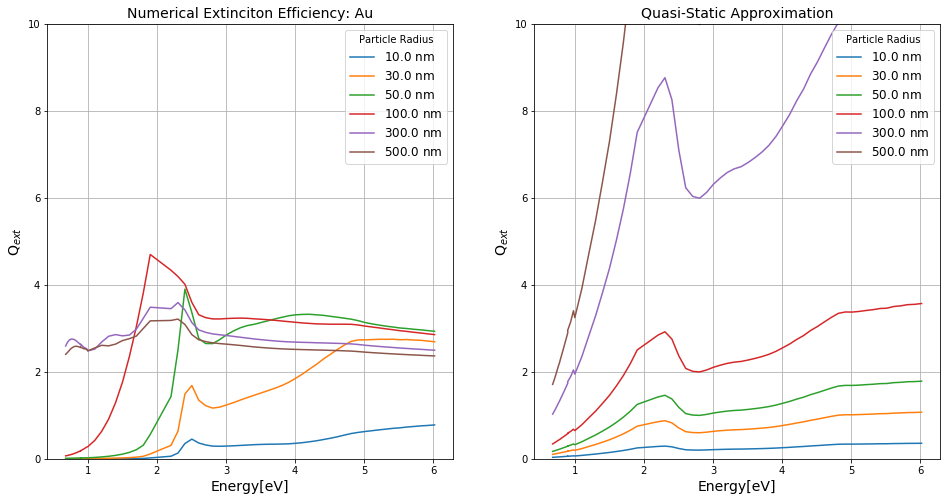

In [350]:
###### Extinction efficiency plots ######## 
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title("Numerical Extinciton Efficiency: Au",size = 14)
[plt.plot(eV_Au,qext_Au[i],label = str(np.round(diameter_Au[i]/2,3)) + "$\ $nm") for i in range(diameter_Au.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(0,10)
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Quasi-Static Approximation",size = 14)
[plt.plot(eV_Au,qext_quasiStatic(m_Au, diameter_Au[i], eV_Au), label = str(np.round(diameter_Au[i]/2,3)) + "$\ $nm") for i in range(diameter_Au.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(0,10)
plt.grid()

plt.show()


We can see that for Au the Quasi-Static Approximation is quite close to the numerical calculation for the smallest particle radii, however the difference in magniturde increases rapidly with the radii after $100$ nm.

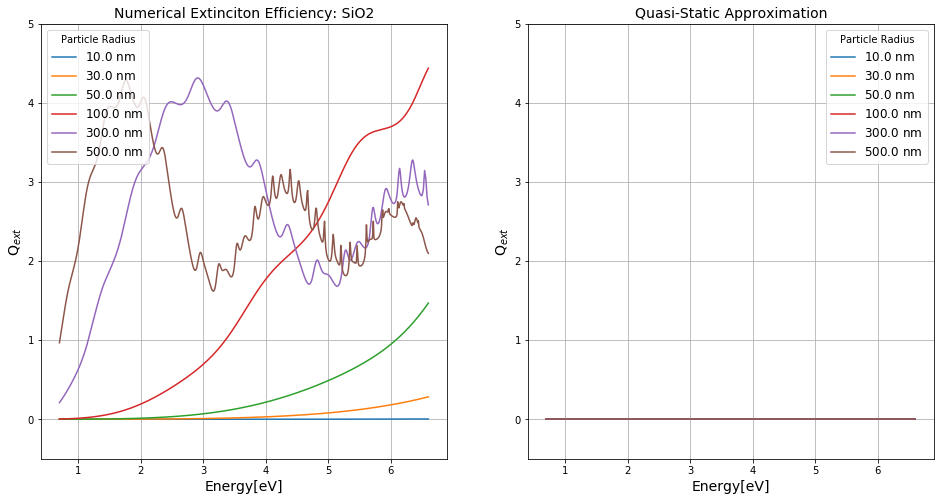

In [351]:
###### Extinction efficiency plots ######## 
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title("Numerical Extinciton Efficiency: SiO2",size = 14)
[plt.plot(eV_SiO2,qext_SiO2[i],label = str(np.round(diameter_SiO2[i]/2,3)) + "$\ $nm") for i in range(diameter_SiO2.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(-0.5,5)
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Quasi-Static Approximation",size = 14)
[plt.plot(eV_SiO2,qext_quasiStatic(m_SiO2, diameter_SiO2[i], eV_SiO2), label = str(np.round(diameter_SiO2[i]/2,3)) + "$\ $nm") for i in range(diameter_SiO2.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("Q$_{ext}$",size = 14)
plt.ylim(-0.5,5)
plt.grid()

plt.show()


We can see that for SiO2 the Quasi-Static Approximation is approximately zero for all the radii used and is only close to the numerical computation for the $10$ nm sphere radius. 

## Scattering Cross Sections:

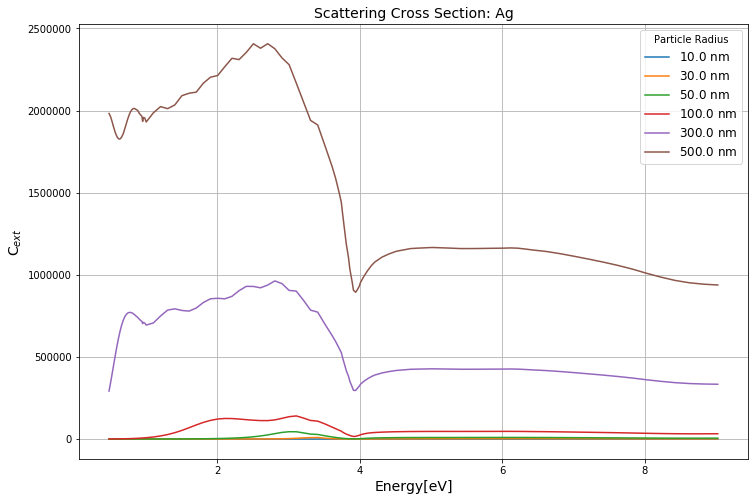

In [352]:
###### Scattering cross section plots ########    
plt.figure(figsize=(12,8))
plt.title("Scattering Cross Section: Ag",size = 14)
[plt.plot(eV_Ag,csca_Ag[i],label =str(np.round(diameter_Ag[i]/2,2)) + "$\ $nm") for i in range(diameter_Ag.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("C$_{ext}$",size = 14)
plt.grid()
plt.show()


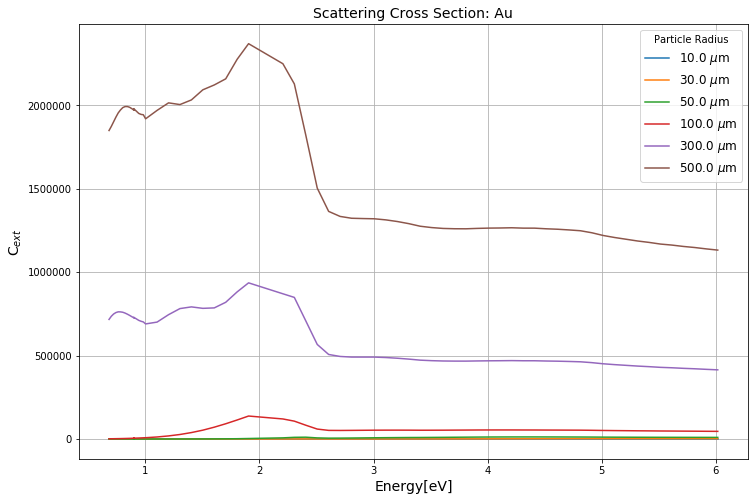

In [353]:
###### Scattering cross section plots ########    
plt.figure(figsize=(12,8))
plt.title("Scattering Cross Section: Au",size = 14)
[plt.plot(eV_Au,csca_Au[i],label = str(np.round(diameter_Au[i]/2,2)) + "$\ \mu$m") for i in range(diameter_Au.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("C$_{ext}$",size = 14)
plt.grid()
plt.show()


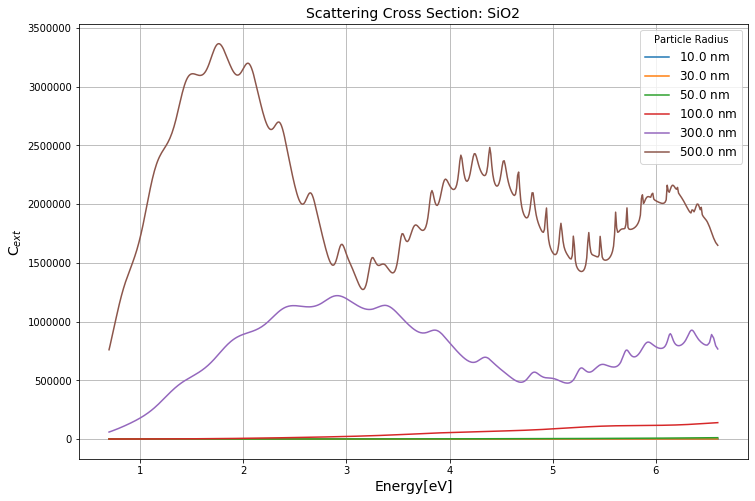

In [354]:
###### Scattering cross section plots ########    
plt.figure(figsize=(12,8))
plt.title("Scattering Cross Section: SiO2",size = 14)
[plt.plot(eV_SiO2,csca_SiO2[i],label = str(np.round(diameter_SiO2[i]/2,2)) + "$\ $nm") for i in range(diameter_SiO2.size)]
plt.legend(fontsize =12, title = "Particle Radius")
plt.xlabel("Energy[eV]",size = 14)
plt.ylabel("C$_{ext}$",size = 14)
plt.grid()
plt.show()

***

# References

[1]. Craig F. Bohren, Donald R. Huffman. *Absorption and Scattering of Light by Small Particles* ("B&H"), chapter: 3, 4, 8 , 11 , 13. 


[2].Benjamin Sumlin. *Python Mie Scattering package (PyMieScatt)*, https://pymiescatt.readthedocs.io/en/latest/forward.html*


[3]. Devendra K. Misra. *Practical Electromagnetics: From Biomedical Sciences to Wireless Communication*, Appendix D: LEGENDRE FUNCTIONS, p.489-490. 


[4]. Stefan A. Maier. *Plasmonics: Fundumentals and Applications*, p.71.
